# Project after clearing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleared_data.csv")

In [3]:
pd.options.display.max_columns = 30

In [4]:
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size(Mb),Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price_EUR
0,Gakondo,com.ishakwe.gakondo,Adventure,NaN,NaN,10.0,10.0,15.0,True,0.0,USD,10.0,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,0.0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,5000.0,7662.0,True,0.0,USD,2.9,5.0 and up,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False,0.0
2,Vibook,com.doantiepvien.crm,Productivity,NaN,NaN,50.0,50.0,58.0,True,0.0,USD,3.7,4.0.3 and up,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,0.0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,10.0,19.0,True,0.0,USD,1.8,4.0.3 and up,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,0.0
4,GROW.me,com.horodyski.grower,Tools,NaN,NaN,100.0,100.0,478.0,True,0.0,USD,6.2,4.1 and up,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,100000.0,100000.0,337109.0,True,0.0,USD,77.0,4.1 and up,ALICE GAME,NaN,"Jun 01, 2021",Teen,False,False,False,0.0
2312940,ORU Online,com.threedream.oruonline,Education,NaN,NaN,100.0,100.0,430.0,True,0.0,USD,44.0,4.1 and up,"3Dream Studios, LLC","Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False,0.0
2312941,Data Structure,datastructure.appoworld.datastucture,Education,NaN,NaN,100.0,100.0,202.0,True,0.0,USD,29.0,5.0 and up,appoworld,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False,0.0
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,1000.0,2635.0,True,0.0,USD,10.0,5.0 and up,Bhakti,"Aug 1, 2016","May 05, 2021",Everyone,True,False,False,0.0


In [5]:
df['Maximum Installs'].describe().astype(int)

count       2301355
mean         321814
std        23614177
min               1
25%              87
50%             710
75%            7457
max     -2147483648
Name: Maximum Installs, dtype: int32

In [6]:
df['Maximum Installs'].quantile(.8)

13501.0

In [7]:
popular_df = df.loc[df['Maximum Installs'] > df['Maximum Installs'].quantile(.8)]

In [8]:
#popular_df.to_csv('Popular_apps.csv', index=False)

In [9]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size(Mb)', 'Minimum Android', 'Developer Id', 'Released',
       'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Price_EUR'],
      dtype='object')

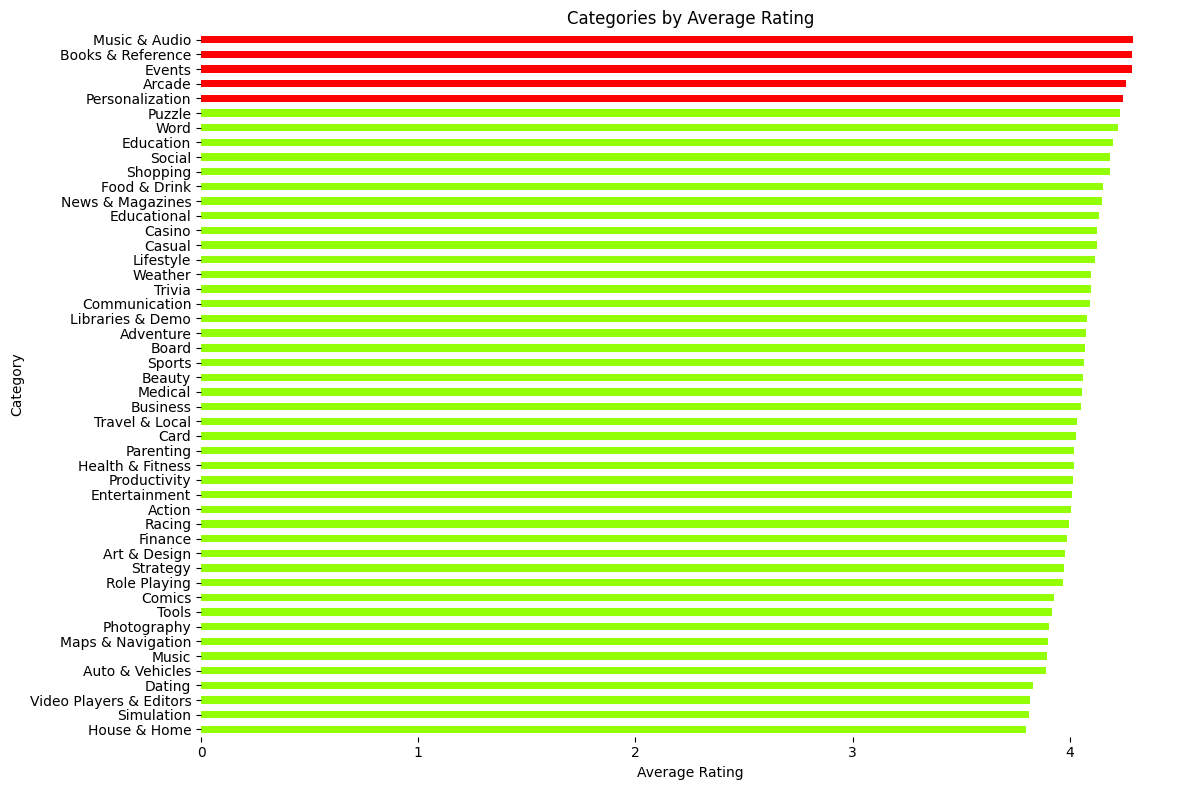

In [56]:
top_categories_by_rating = df.groupby('Category')['Rating'].mean()
colors = ["#92FF07"]*43 + ["#FF0000"] *5

 
top_categories_by_rating_reversed = top_categories_by_rating.iloc[::-1]

plt.figure(figsize=(12, 8))
top_categories_by_rating_reversed.sort_values().plot(kind='barh', color=colors)  # Use 'barh' for horizontal bar plot

plt.title('Categories by Average Rating')
plt.xlabel('Average Rating')  
plt.ylabel('Category')       
sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()

plt.show()

In [46]:
len(df.Category.value_counts())

48

### Plot Top 5 Categories with the most number of apps

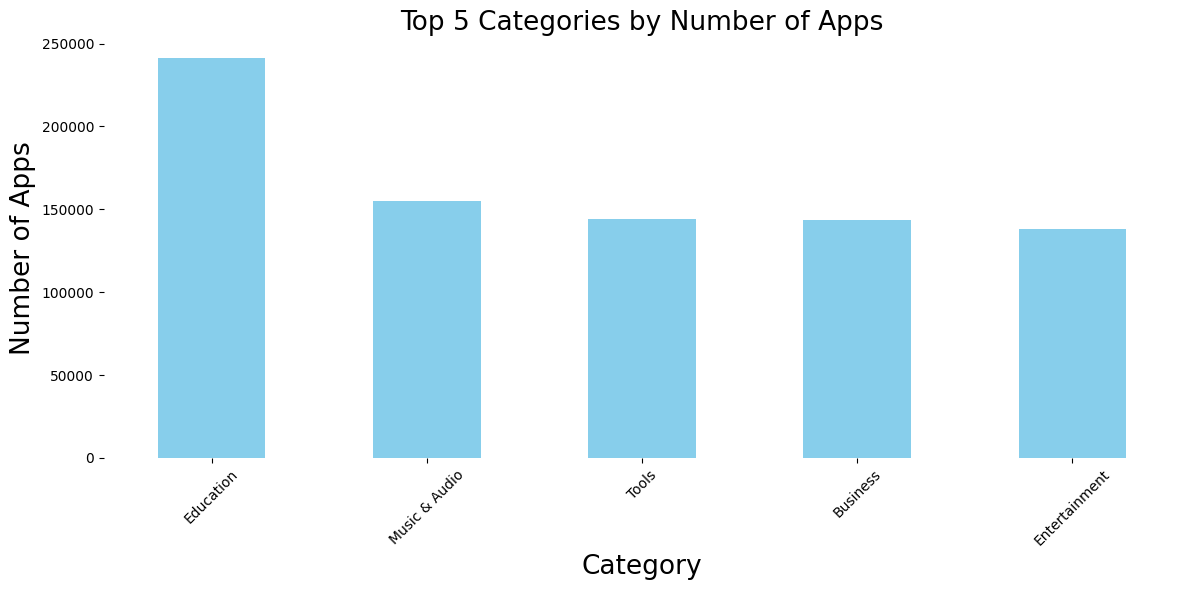

In [11]:
category_counts = df['Category'].value_counts()
top_categories = category_counts.head(5)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Categories by Number of Apps',fontsize=19)
plt.xlabel('Category',fontsize=19)
plt.ylabel('Number of Apps',fontsize=19)
plt.xticks(rotation=45)
sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()
plt.show()


### Plot Top 5 categories by average rating

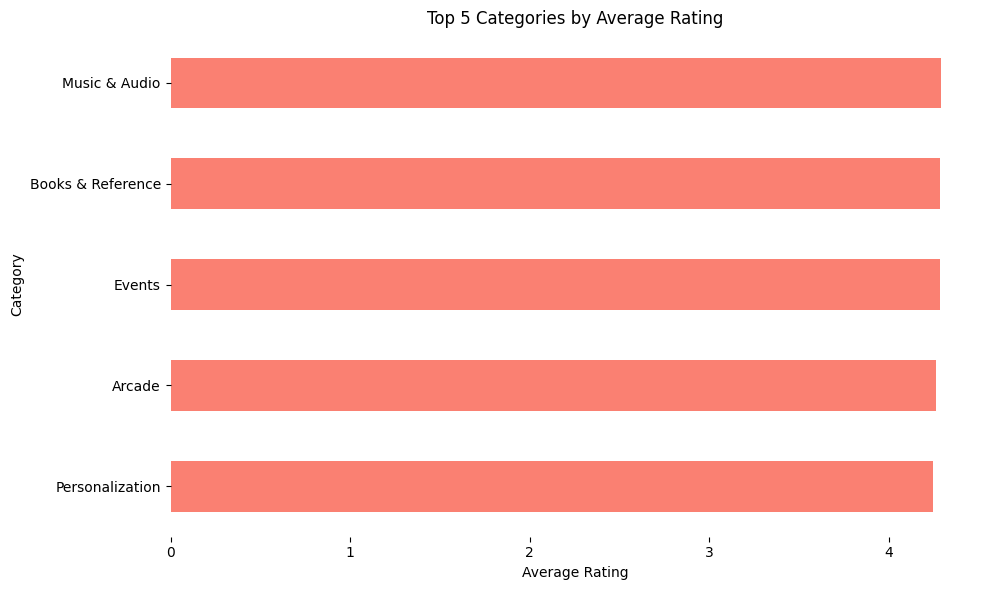

In [12]:
top_categories_by_rating = df.groupby('Category')['Rating'].mean().nlargest(5)


top_categories_by_rating_reversed = top_categories_by_rating.iloc[::-1]

plt.figure(figsize=(10, 6))
top_categories_by_rating_reversed.plot(kind='barh', color='salmon')  # Use 'barh' for horizontal bar plot

plt.title('Top 5 Categories by Average Rating')
plt.xlabel('Average Rating')  
plt.ylabel('Category')       
sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()

plt.show()

### Plot Top 5 categories by total downloads


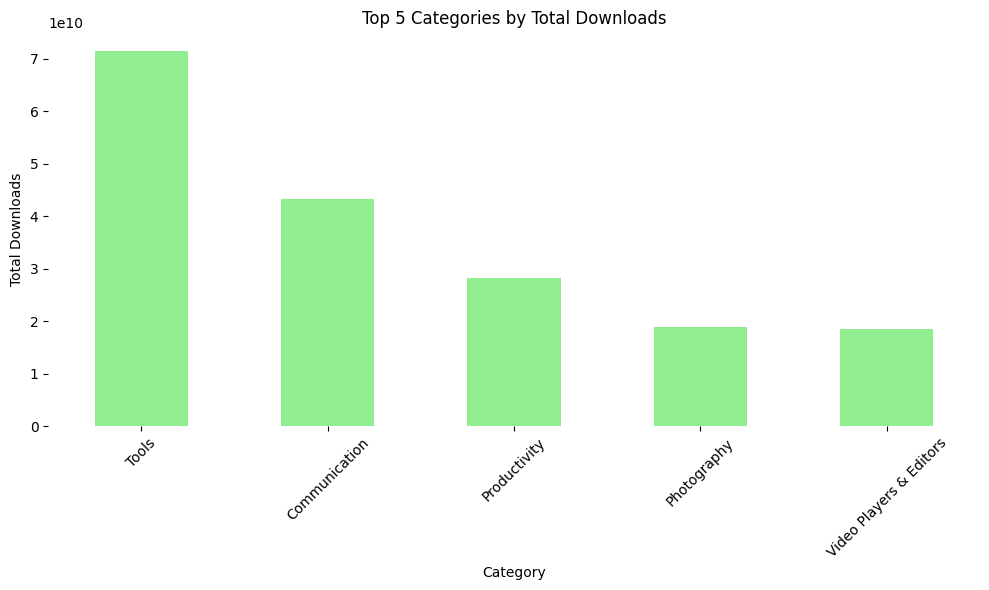

In [13]:
top_categories_by_downloads = df.groupby('Category')['Installs'].sum().nlargest(5)
plt.figure(figsize=(10, 6))

top_categories_by_downloads.plot(kind='bar', color='lightgreen')

plt.title('Top 5 Categories by Total Downloads')
plt.xlabel('Category')                         
plt.ylabel('Total Downloads')
plt.xticks(rotation=45)
sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()
plt.show()

In [14]:
df.groupby('Category')['Installs'].sum().nlargest(5)


Category
Tools                      7.144047e+10
Communication              4.321659e+10
Productivity               2.831405e+10
Photography                1.899896e+10
Video Players & Editors    1.859115e+10
Name: Installs, dtype: float64

### Plot Distribution of downloads


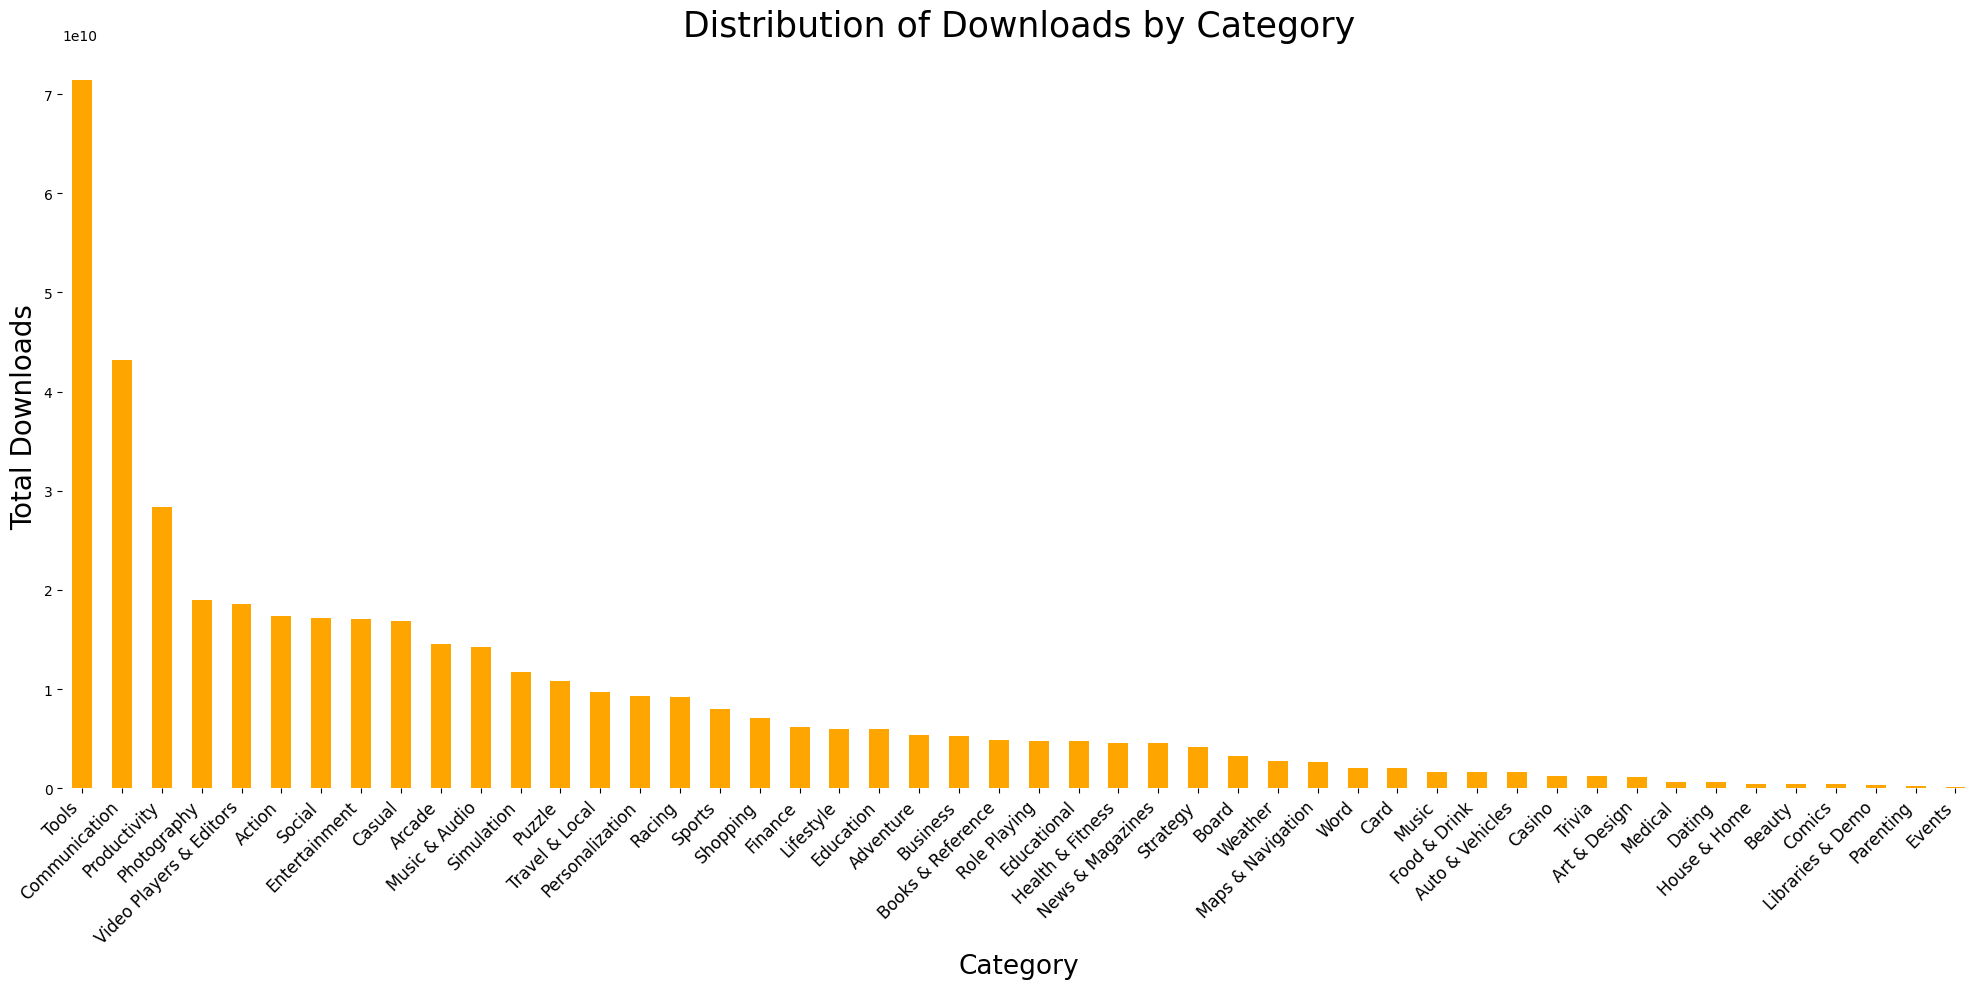

In [15]:
downloads_distribution = df.groupby('Category')['Installs'].sum()
plt.figure(figsize=(20, 10))
downloads_distribution.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Distribution of Downloads by Category', fontsize=25)
plt.xlabel('Category',fontsize=19)
plt.ylabel('Total Downloads', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12) 
sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()
plt.show()

### Plot Rating distribution for all categories


In [16]:
df["Free"].value_counts()

Free
True     2267876
False      45068
Name: count, dtype: int64

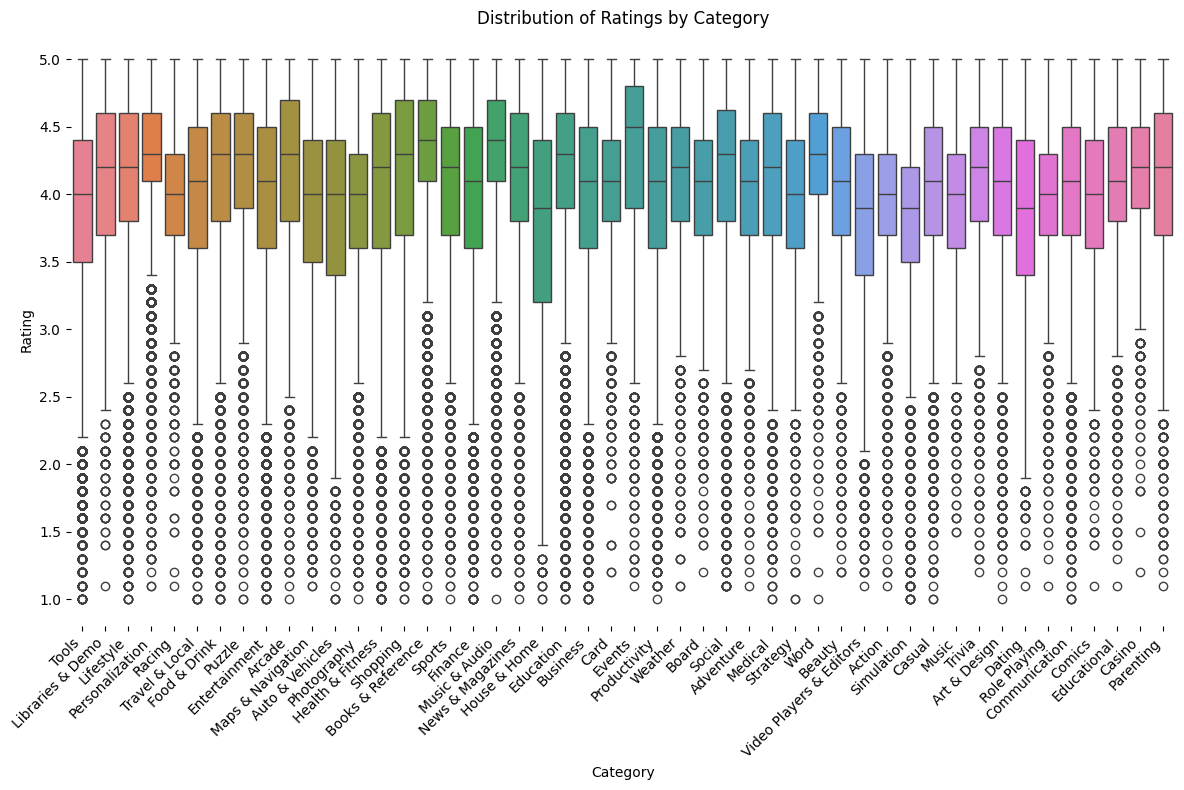

In [17]:
legit_votes_threshold = 10
legit_ratings_df = df[df['Rating Count'] > legit_votes_threshold]


plt.figure(figsize=(12, 8))

sns.boxplot(x='Category', y='Rating', data=legit_ratings_df, hue='Category', legend=False)

plt.title('Distribution of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
sns.despine(top=True, bottom=True,left=True)

plt.show()

In [18]:
df["Rating"].mean()

4.1009148182677535

### Plot Rating and Downloads


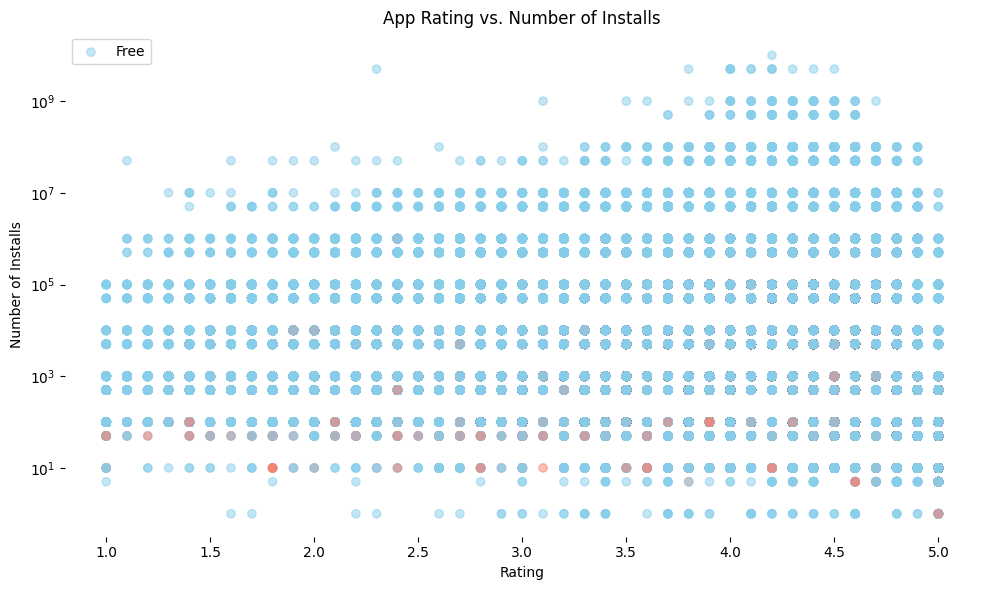

In [19]:


colors = df['Free'].map({True: 'skyblue', False: 'salmon'})


plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Installs'], c=colors, alpha=0.5)
plt.title('App Rating vs. Number of Installs')
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.xscale('linear')  # Set the scale of x-axis to linear
plt.yscale('log')     # Set the scale of y-axis to logarithmic
plt.legend(['Free', 'Paid'], loc='upper left')
sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()
plt.show()

### Distribution of App Ratings

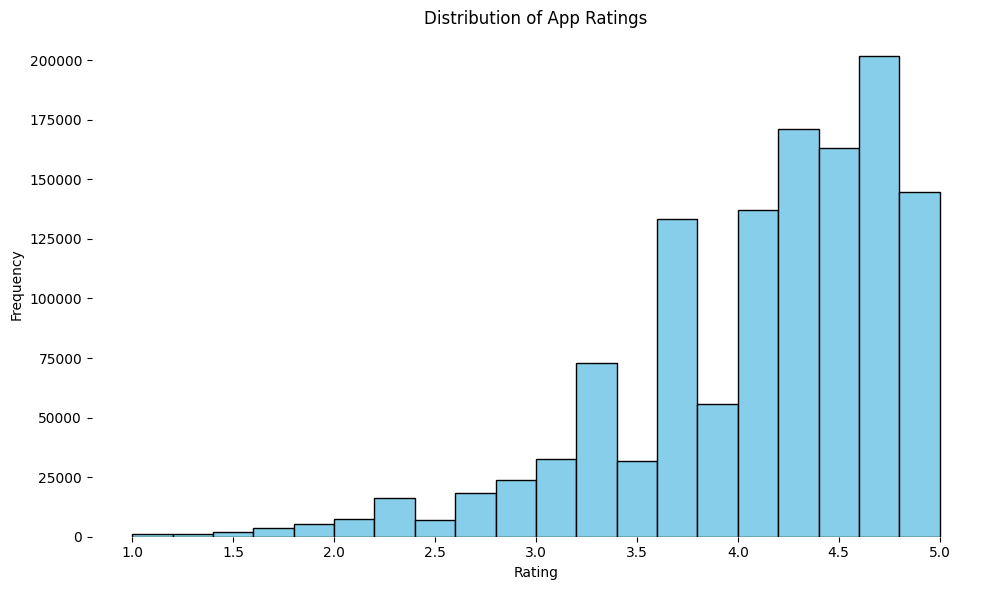

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()
plt.show()


### Number of Free vs. Paid Apps by Category

<Figure size 1200x800 with 0 Axes>

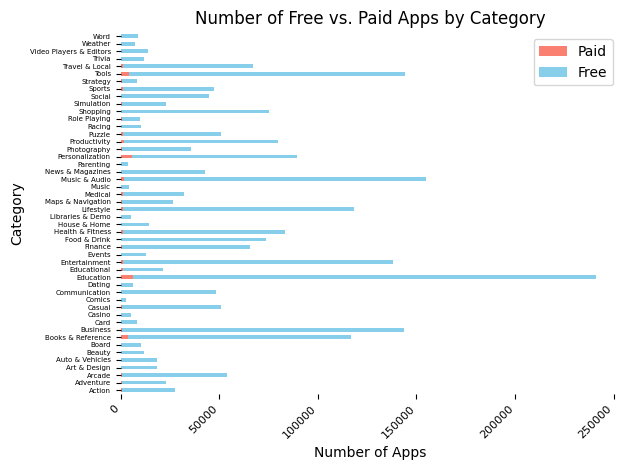

In [21]:
plt.figure(figsize=(12, 8))  
df.groupby(['Category', 'Free']).size().unstack().plot(kind='barh', stacked=True, color=['salmon', 'skyblue'])
plt.title('Number of Free vs. Paid Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=5)
plt.legend(['Paid', 'Free'])
sns.despine(top=True, bottom=True, left=True)


plt.tight_layout()
plt.show()

In [22]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size(Mb)', 'Minimum Android', 'Developer Id', 'Released',
       'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Price_EUR'],
      dtype='object')

In [23]:
df['Released'] = pd.to_datetime(df['Released'], format='%b %d, %Y', errors='coerce')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%b %d, %Y', errors='coerce')

### Number of Apps Released and Updated Over Time

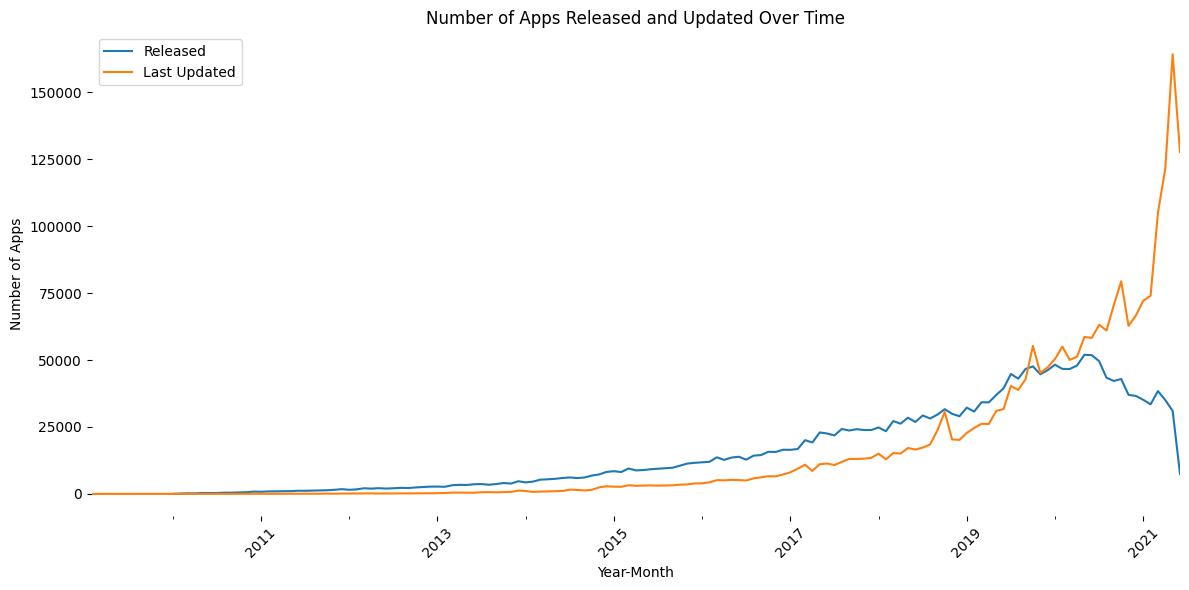

In [24]:

# Extract year and month from 'Released' and 'Last Updated' columns
df['Released_YearMonth'] = df['Released'].dt.to_period('M')
df['LastUpdated_YearMonth'] = df['Last Updated'].dt.to_period('M')

# Count the number of apps released and updated each month
released_counts = df['Released_YearMonth'].value_counts().sort_index()
updated_counts = df['LastUpdated_YearMonth'].value_counts().sort_index()

# Create a time trend plot
plt.figure(figsize=(12, 6))
released_counts.plot(label='Released')
updated_counts.plot(label='Last Updated')
plt.title('Number of Apps Released and Updated Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.legend()
sns.despine(top=True, bottom=True,left=True)


plt.tight_layout()
plt.show()

In [25]:
df["Released"].max()

Timestamp('2021-06-16 00:00:00')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   App Name               object        
 1   App Id                 object        
 2   Category               object        
 3   Rating                 float64       
 4   Rating Count           float64       
 5   Installs               float64       
 6   Minimum Installs       float64       
 7   Maximum Installs       float64       
 8   Free                   bool          
 9   Price                  float64       
 10  Currency               object        
 11  Size(Mb)               float64       
 12  Minimum Android        object        
 13  Developer Id           object        
 14  Released               datetime64[ns]
 15  Last Updated           datetime64[ns]
 16  Content Rating         object        
 17  Ad Supported           bool          
 18  In App Purchases      

In [27]:
df['Installs'].value_counts()

Installs
1.000000e+02    443368
1.000000e+03    398199
1.000000e+01    300156
1.000000e+04    256723
5.000000e+02    189077
5.000000e+01    170465
5.000000e+03    143593
1.000000e+05    110257
5.000000e+04     75359
5.000000e+00     73772
1.000000e+00     65345
1.000000e+06     33650
5.000000e+05     27012
0.000000e+00     11566
5.000000e+06      6595
1.000000e+07      6192
5.000000e+07       824
1.000000e+08       549
5.000000e+08        65
1.000000e+09        55
5.000000e+09        14
1.000000e+10         1
Name: count, dtype: int64

In [28]:
df.isna().sum()

App Name                       5
App Id                         0
Category                       0
Rating                   1082645
Rating Count             1082645
Installs                     107
Minimum Installs             107
Maximum Installs           11589
Free                           0
Price                          0
Currency                    1371
Size(Mb)                   74973
Minimum Android             6530
Developer Id                  33
Released                   71053
Last Updated                   0
Content Rating                 0
Ad Supported                   0
In App Purchases               0
Editors Choice                 0
Price_EUR                   1371
Released_YearMonth         71053
LastUpdated_YearMonth          0
dtype: int64

In [29]:
max_install_count = df['Maximum Installs'].value_counts().sort_index().reset_index()

In [30]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [31]:
df['Maximum Installs'].describe()

count       2301355.00
mean         321814.16
std        23614177.63
min               1.00
25%              87.00
50%             710.00
75%            7457.00
max     12057627016.00
Name: Maximum Installs, dtype: float64

<Figure size 3000x4500 with 0 Axes>

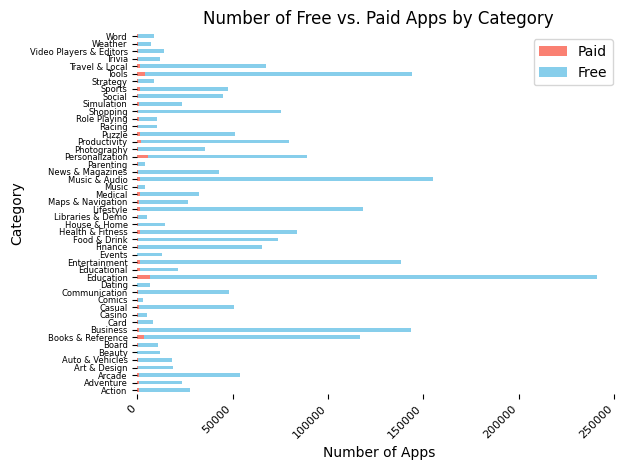

In [57]:
plt.figure(figsize=(30, 45))  
df.groupby(['Category', 'Free']).size().unstack().plot(kind='barh', stacked=True, color=['salmon', 'skyblue'])
plt.title('Number of Free vs. Paid Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=6)
plt.legend(['Paid', 'Free'])
sns.despine(top=True, bottom=True, left=True)


plt.tight_layout()
plt.show()

In [58]:
df["Free"].value_counts()

Free
True     2267876
False      45068
Name: count, dtype: int64

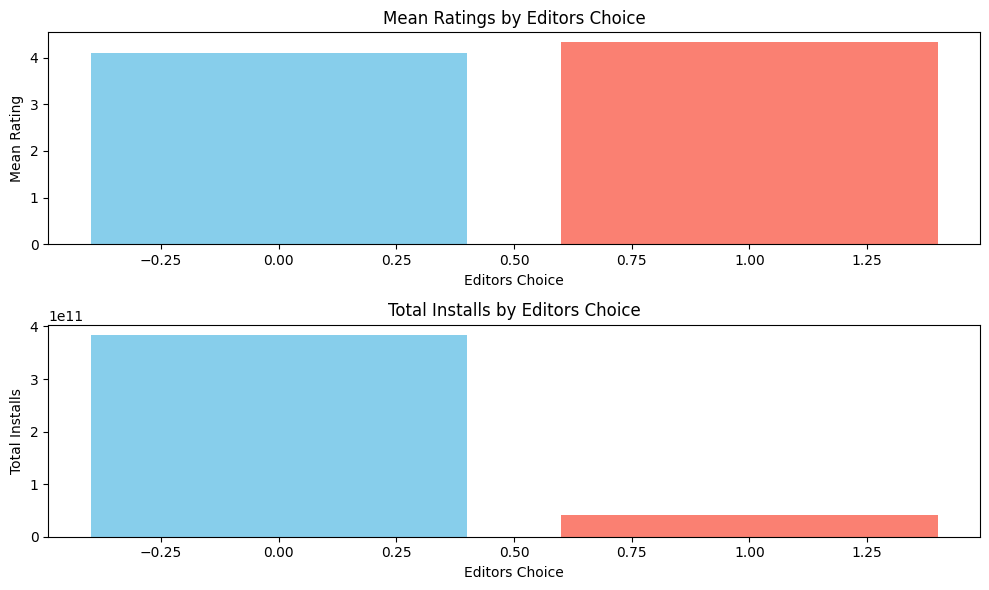

In [32]:
editors_choice_analysis = df.groupby('Editors Choice').agg({'Rating': 'mean', 'Installs': 'sum'}).reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))

# Plot mean ratings
plt.subplot(2, 1, 1)
plt.bar(editors_choice_analysis['Editors Choice'], editors_choice_analysis['Rating'], color=['skyblue', 'salmon'])
plt.title('Mean Ratings by Editors Choice')
plt.xlabel('Editors Choice')
plt.ylabel('Mean Rating')

# Plot total installs
plt.subplot(2, 1, 2)
plt.bar(editors_choice_analysis['Editors Choice'], editors_choice_analysis['Installs'], color=['skyblue', 'salmon'])
plt.title('Total Installs by Editors Choice')
plt.xlabel('Editors Choice')
plt.ylabel('Total Installs')

plt.tight_layout()
plt.show()

In [33]:
df["Installs"].count()

2312837

### AD supported apps. T/F

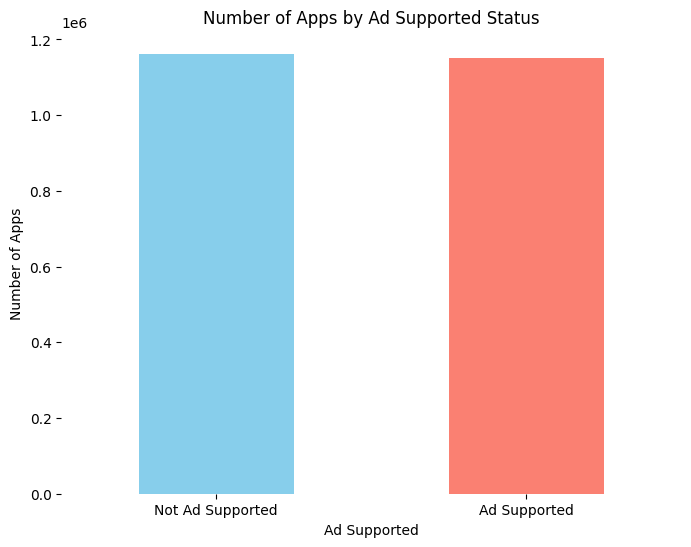

In [34]:
ad_supported_counts = df['Ad Supported'].value_counts()

plt.figure(figsize=(8, 6))
ad_supported_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Apps by Ad Supported Status')
plt.xlabel('Ad Supported')
plt.ylabel('Number of Apps')
plt.xticks(ticks=[0, 1], labels=['Not Ad Supported', 'Ad Supported'], rotation=0)
sns.despine(top=True, bottom=True,left=True)

plt.show()

In [35]:
df["Ad Supported"].value_counts()

Ad Supported
False    1162170
True     1150774
Name: count, dtype: int64

### Number of Apps by In app Purchase

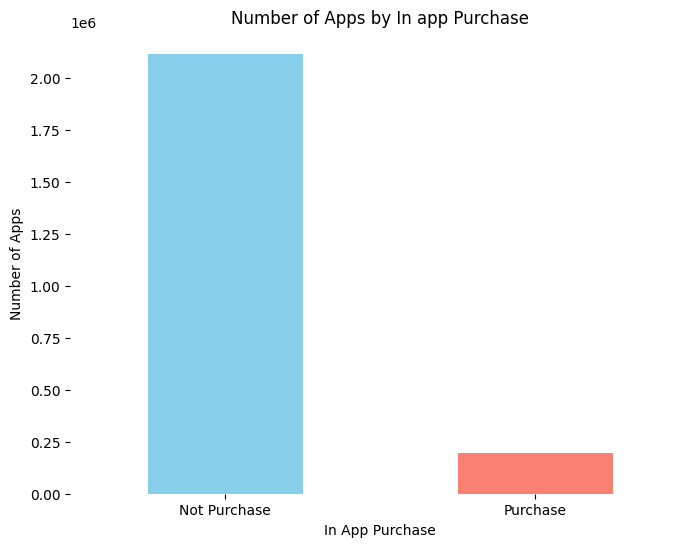

In [36]:
ad_supported_counts = df['In App Purchases'].value_counts()

plt.figure(figsize=(8, 6))
ad_supported_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Apps by In app Purchase')
plt.xlabel('In App Purchase')
plt.ylabel('Number of Apps')
plt.xticks(ticks=[0, 1], labels=['Not Purchase', 'Purchase'], rotation=0)
sns.despine(top=True, bottom=True,left=True)

plt.show()

In [37]:
df["In App Purchases"].value_counts()

In App Purchases
False    2117635
True      195309
Name: count, dtype: int64

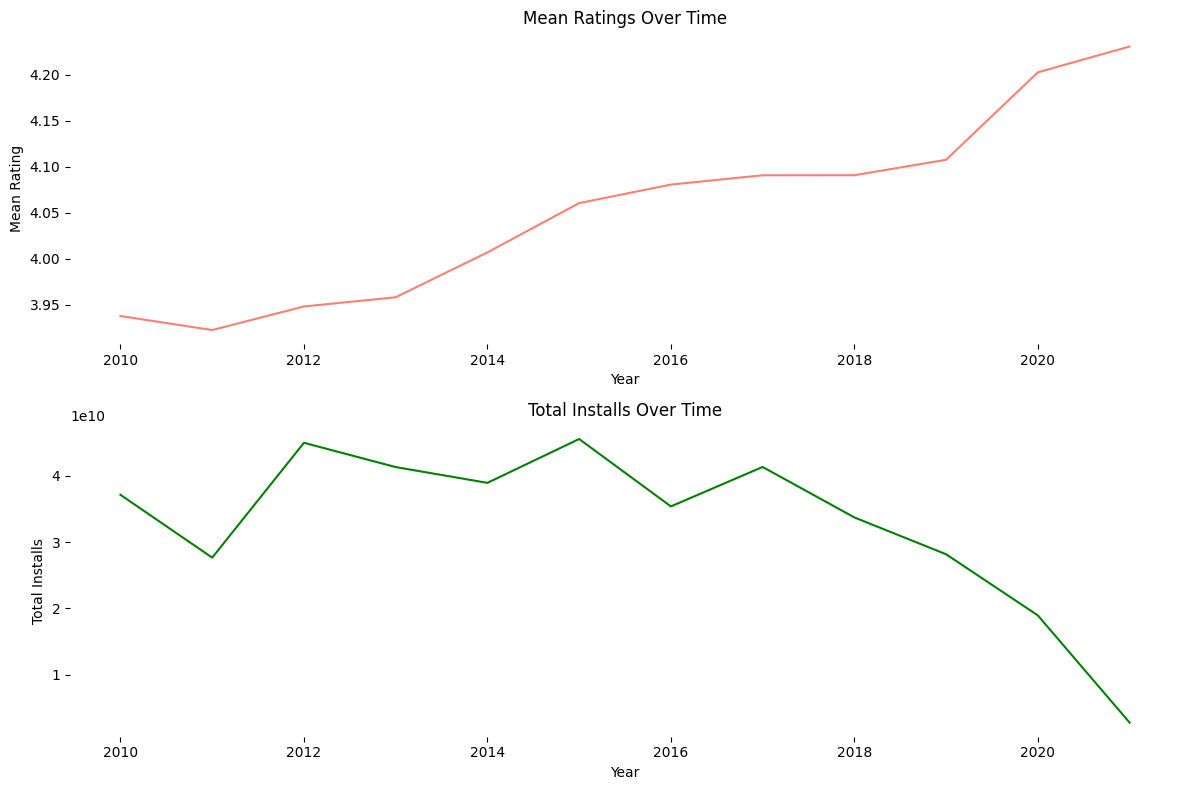

In [38]:
# Group by 'Released' year and count the number of apps released each year
app_releases = df.groupby(df['Released'].dt.year).size()

# Group by 'Released' year and calculate mean rating for each year
mean_ratings_over_time = df.groupby(df['Released'].dt.year)['Rating'].mean()

# Group by 'Released' year and calculate total installs for each year
installs_over_time = df.groupby(df['Released'].dt.year)['Installs'].sum()

# Create subplots for mean ratings and total installs
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot mean ratings over time
axes[0].plot(mean_ratings_over_time.index, mean_ratings_over_time.values, label='Mean Rating', color='salmon')
axes[0].set_title('Mean Ratings Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Mean Rating')
sns.despine(top=True, bottom=True,left=True)

# Plot total installs over time
axes[1].plot(installs_over_time.index, installs_over_time.values, label='Total Installs', color='green')
axes[1].set_title('Total Installs Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Installs')
sns.despine(top=True, bottom=True,left=True)


plt.tight_layout()
plt.show()


In [39]:
df["Released"].max()

Timestamp('2021-06-16 00:00:00')

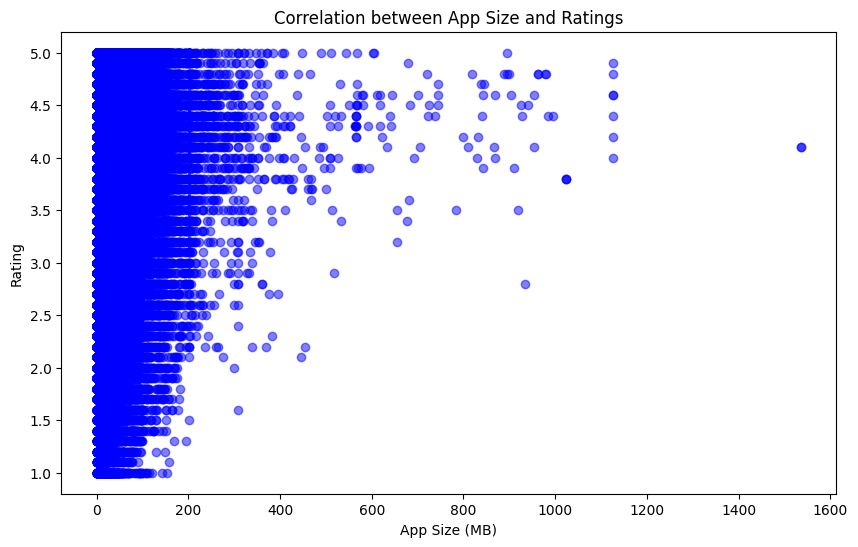

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Size(Mb)'], df['Rating'], color='blue', alpha=0.5)
plt.title('Correlation between App Size and Ratings')
plt.xlabel('App Size (MB)')
plt.ylabel('Rating')

plt.show()